In [ ]:
# Copyright 2024 Forusone(shins777@gmail.com)
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# ML Training Basic

* [XGBoost Implementation on IRIS dataset](https://www.kaggle.com/code/kevalm/xgboost-implementation-on-iris-dataset-python/notebook)
* [Iris dataset](https://www.tensorflow.org/datasets/catalog/iris) from [TensorFlow Datasets](https://www.tensorflow.org/datasets/catalog/overview).

In [1]:
# @title Package install
%pip install --upgrade --quiet --user  scikit-learn==1.3.1 \
                                       xgboost==1.7.5

## LinearRegression

In [2]:
# @title Importing dataset from sklearn

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn import datasets
from sklearn import metrics

dataset = datasets.fetch_california_housing() #dataset loading
print(dataset.DESCR)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
# @title Training data information.
import pandas as pd

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [6]:
x_data = dataset.data
y_data = dataset.target
print(x_data.shape)
print(y_data.shape)

(20640, 8)
(20640,)


In [7]:
# @title Training data preparation

from sklearn import model_selection

# Split data into training and testing sets
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size=0.3)


In [8]:
# @title Model training
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()

estimator.fit(x_train, y_train)


LinearRegression()

In [9]:
# @title Model evaluation
y_predict = estimator.predict(x_train)
score = metrics.r2_score(y_train, y_predict)
print(score) #1.0

y_predict = estimator.predict(x_test)
score = metrics.r2_score(y_test, y_predict)
print(score) #1.0


0.6081723218550257
0.600957713367051


In [12]:
x_test1 = [[8.3252,41.0,6.984127,1.023810,322.0,  2.555556,37.88, -122.23 ]]

In [13]:
y_predict = estimator.predict(x_test1)
y_predict

array([4.12796245])

## Classification

In [27]:
# @title Importing dataset from sklearn
from sklearn import datasets
from sklearn import metrics

iris = datasets.load_iris() #dataset loading
X = iris.data               #Features stored in X
y = iris.target             #Class variable

print(iris.DESCR)
print(X.shape)
print(y.shape)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [30]:
# @title Data shape
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [29]:
# @title Split training data
#Splitting dataset into Training (80%) and testing data (20%) using train_test_split
from sklearn.model_selection import train_test_split

# https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# @title Data preparation
#importing library and segregation of data as train and test using DMatrix Data structure
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [21]:
# @title Set paramaters
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 5  # the number of training iterations

In [22]:
# @title Model builing using training data
bst = xgb.train(param, dtrain, num_round)

[12:22:05] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [23]:
# @title To calculate predication using test data
y_predict = bst.predict(dtest)
print(y_predict)

[[0.08698966 0.82529145 0.08771891]
 [0.82463884 0.08897056 0.08639056]
 [0.08697931 0.09218644 0.8208342 ]
 [0.08499291 0.8063477  0.10865935]
 [0.07517894 0.7132403  0.21158072]
 [0.82463884 0.08897056 0.08639056]
 [0.08698966 0.82529145 0.08771891]
 [0.08697931 0.09218644 0.8208342 ]
 [0.08289977 0.7864897  0.13061051]
 [0.08698966 0.82529145 0.08771891]
 [0.08697931 0.09218644 0.8208342 ]
 [0.82463884 0.08897056 0.08639056]
 [0.82463884 0.08897056 0.08639056]
 [0.82463884 0.08897056 0.08639056]
 [0.82463884 0.08897056 0.08639056]
 [0.08499291 0.8063477  0.10865935]
 [0.08697931 0.09218644 0.8208342 ]
 [0.08656568 0.82126904 0.09216528]
 [0.08698966 0.82529145 0.08771891]
 [0.08697931 0.09218644 0.8208342 ]
 [0.82463884 0.08897056 0.08639056]
 [0.08366104 0.12681969 0.78951925]
 [0.82463884 0.08897056 0.08639056]
 [0.08697931 0.09218644 0.8208342 ]
 [0.08697931 0.09218644 0.8208342 ]
 [0.08697931 0.09218644 0.8208342 ]
 [0.08697931 0.09218644 0.8208342 ]
 [0.08697931 0.09218644 0.82

In [24]:
bst.dump_model('dump.raw.txt')

In [25]:
#Prediction using test data
preds = bst.predict(dtest)
preds

array([[0.08698966, 0.82529145, 0.08771891],
       [0.82463884, 0.08897056, 0.08639056],
       [0.08697931, 0.09218644, 0.8208342 ],
       [0.08499291, 0.8063477 , 0.10865935],
       [0.07517894, 0.7132403 , 0.21158072],
       [0.82463884, 0.08897056, 0.08639056],
       [0.08698966, 0.82529145, 0.08771891],
       [0.08697931, 0.09218644, 0.8208342 ],
       [0.08289977, 0.7864897 , 0.13061051],
       [0.08698966, 0.82529145, 0.08771891],
       [0.08697931, 0.09218644, 0.8208342 ],
       [0.82463884, 0.08897056, 0.08639056],
       [0.82463884, 0.08897056, 0.08639056],
       [0.82463884, 0.08897056, 0.08639056],
       [0.82463884, 0.08897056, 0.08639056],
       [0.08499291, 0.8063477 , 0.10865935],
       [0.08697931, 0.09218644, 0.8208342 ],
       [0.08656568, 0.82126904, 0.09216528],
       [0.08698966, 0.82529145, 0.08771891],
       [0.08697931, 0.09218644, 0.8208342 ],
       [0.82463884, 0.08897056, 0.08639056],
       [0.08366104, 0.12681969, 0.78951925],
       [0.

In [26]:
#Calculating prediction accuracy
import numpy as np
best_preds = np.asarray([np.argmax(line) for line in preds])
print(best_preds)

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

print(accuracy_score(y_test, best_preds))
print(precision_score(y_test, best_preds, average='macro'))
print(recall_score(y_test, best_preds, average='macro'))
print(f1_score(y_test, best_preds, average='macro'))
print(confusion_matrix(y_test, best_preds))
print(classification_report(y_test, best_preds))


# >> 1.0

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
1.0
1.0
1.0
1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [89]:
#Saving the model in pkl file
import joblib # Import joblib directly
joblib.dump(bst, 'bst_model.pkl', compress=True)
# bst = joblib.load('bst_model.pkl') # load it later

['bst_model.pkl']

In [90]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

xgb.plot_tree(bst, num_trees=1)
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('treeIris.png')

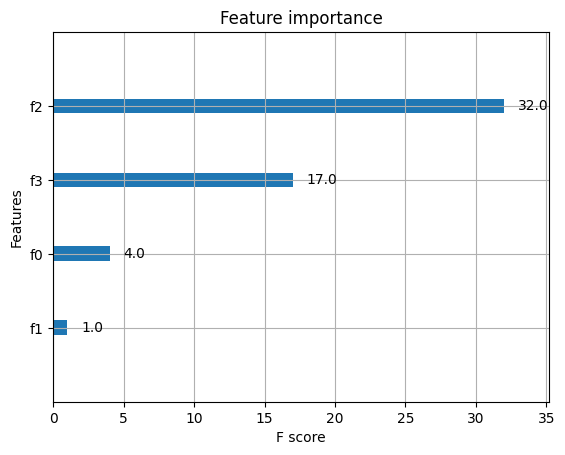

In [20]:
#Feature importance
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(bst)
pyplot.show()

#f1 - sepal length in cm
#f2 - sepal width in cm
#f3 - petal length in cm
#f4 - petal width in cm